In [8]:
from deepface import DeepFace
import os
import cv2
import random
from tqdm import tqdm

backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'fastmtcnn',
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'centerface',
]


#path = '/scratch/UCLA-protest256/img/train'
path = '/scratch/UCLA-protest-training-eval/img/train_vgkg'

In [9]:
ages = []
gender = []
races = []

image_paths = [os.path.join(path, img) for img in os.listdir(path)]
sampled_paths = random.sample(image_paths, 2500)

for image_path in tqdm(sampled_paths, desc="Processing images"):
    #face_objs = DeepFace.extract_faces(
    #    img_path = img_path, 
    #    detector_backend = backends[0],
    #    )
    
    objs = DeepFace.analyze(
        img_path = image_path, 
        actions = ['age', 'gender', 'race'],
        enforce_detection= False,
        silent = True,
        detector_backend = backends[5],
    )
    #print(objs)

    if len(objs) > 0:
        if objs[0]['face_confidence'] >= 0.5:
            #print('Saving...')
            ages.append(objs[0]['age'])
            gender.append(objs[0]['dominant_gender'])
            races.append(objs[0]['dominant_race'])

Processing images:   0%|          | 0/2500 [00:00<?, ?it/s]

Processing images: 100%|██████████| 2500/2500 [50:15<00:00,  1.21s/it] 


In [10]:
import numpy as np
import pandas as pd

data_name = 'stylegan_vgkg'
path = './face_att_csvs/'

ages_df = pd.DataFrame(np.array(ages))
gender_df = pd.DataFrame(np.array(gender))
races_df = pd.DataFrame(np.array(races))

ages_df.to_csv(path+data_name+'_ages.csv', header=False, index=False)
gender_df.to_csv(path+data_name+'_gender.csv', header=False, index=False)
races_df.to_csv(path+data_name+'_races.csv', header=False, index=False)


In [6]:
print(len(ages))

1859


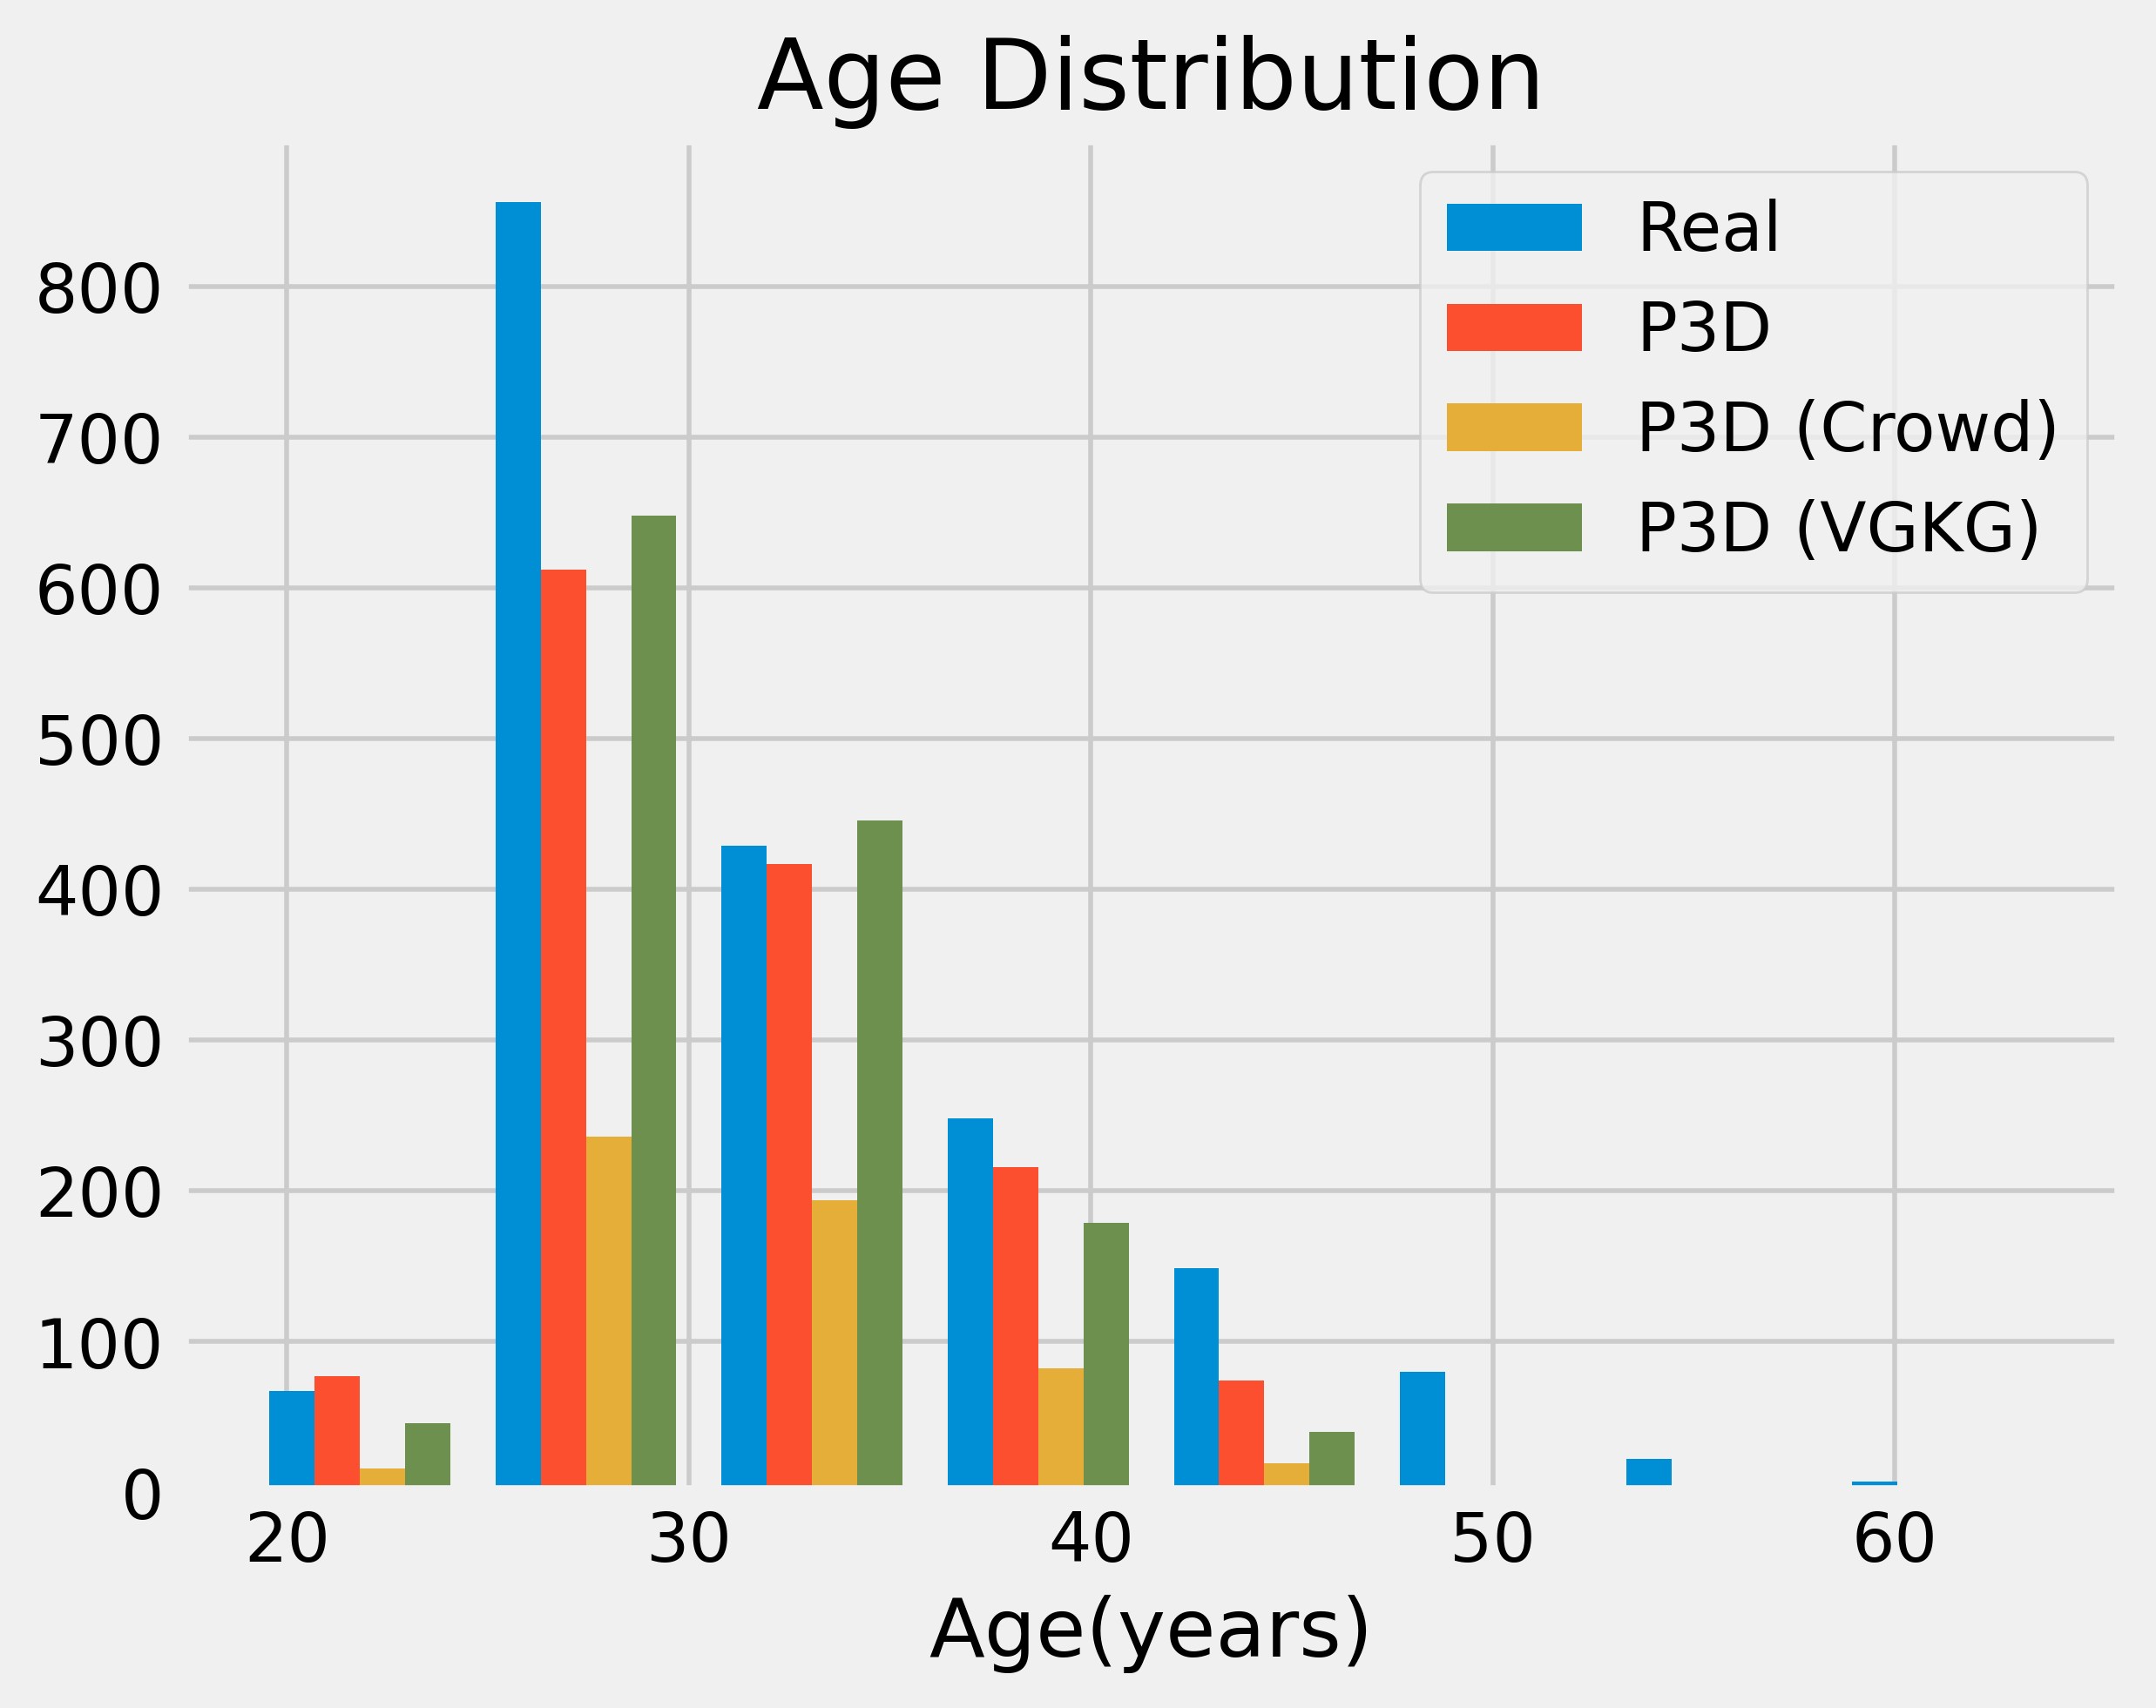

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
plt.style.use('fivethirtyeight')

# AGES
ages_real = pd.read_csv('./face_att_csvs/real_ages.csv')
ages_stylegan = pd.read_csv('./face_att_csvs/stylegan_ages.csv')
ages_stylegan_cwdcnt = pd.read_csv('./face_att_csvs/stylegan_cwdcnt_ages.csv')
ages_stylegan_vgkg = pd.read_csv('./face_att_csvs/stylegan_vgkg_ages.csv')


fig, ax = plt.subplots(dpi=400)
plt.title("Age Distribution")
plt.hist((ages_real.to_numpy().flatten(),ages_stylegan.to_numpy().flatten(),ages_stylegan_cwdcnt.to_numpy().flatten(),
            ages_stylegan_vgkg.to_numpy().flatten() ), label = ("Real","P3D","P3D (Crowd)","P3D (VGKG)"),bins=8, align='mid')
plt.legend(loc='upper right')
plt.xlabel('Age(years)')
fig.savefig(os.path.join('files', 'face_att_ages.pdf'),bbox_inches='tight', 
               transparent=True,
               pad_inches=0)
plt.show()


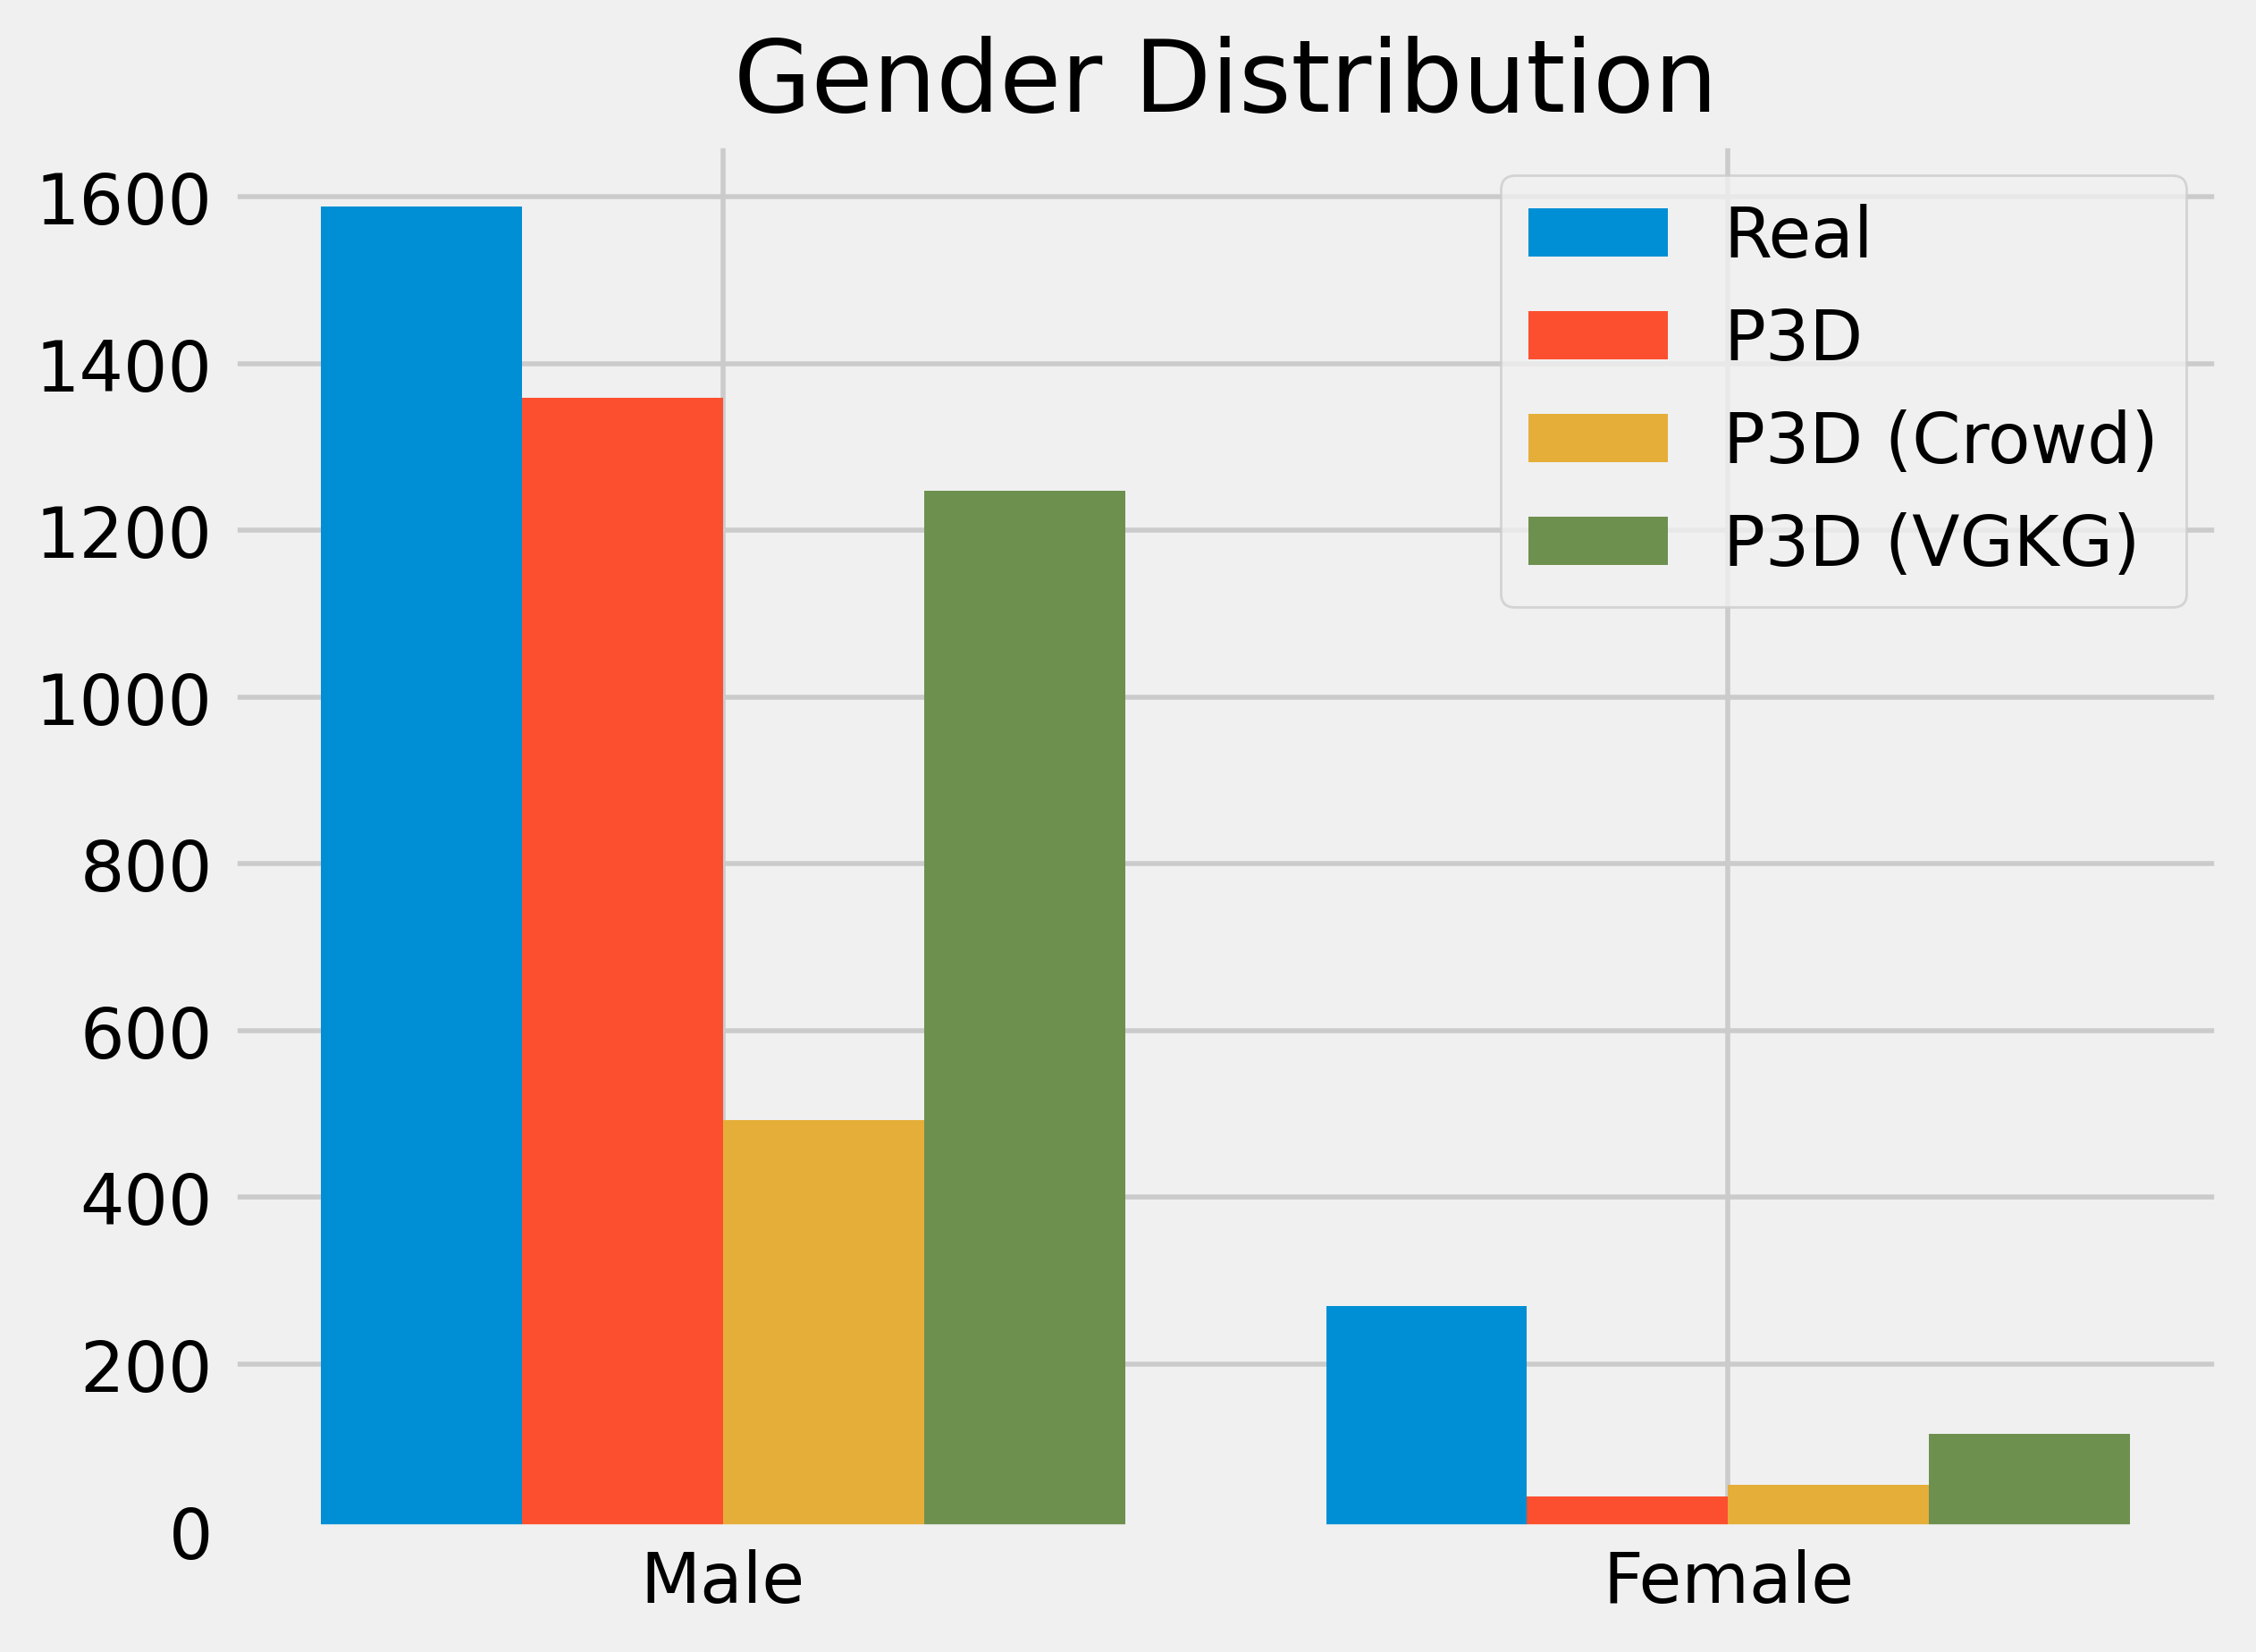

In [4]:
# genders
genders_real = pd.read_csv('./face_att_csvs/real_gender.csv')
genders_stylegan = pd.read_csv('./face_att_csvs/stylegan_gender.csv')
genders_stylegan_cwdcnt = pd.read_csv('./face_att_csvs/stylegan_cwdcnt_gender.csv')
genders_stylegan_vgkg = pd.read_csv('./face_att_csvs/stylegan_vgkg_gender.csv')

fig, ax = plt.subplots(dpi=400)
plt.title("Gender Distribution")
plt.hist((genders_real.to_numpy().flatten(),genders_stylegan.to_numpy().flatten(),genders_stylegan_cwdcnt.to_numpy().flatten(),
            genders_stylegan_vgkg.to_numpy().flatten() ), label = ("Real","P3D","P3D (Crowd)","P3D (VGKG)"), bins=2, align='mid')
plt.legend(loc='upper right')
labels = ['Male', 'Female']
plt.xticks([0.25,0.75], labels)
fig.savefig(os.path.join('files', 'face_att_genders.pdf'),bbox_inches='tight', 
               transparent=True,
               pad_inches=0)
plt.show()

In [5]:
# races

races_real = pd.read_csv('./face_att_csvs/real_races.csv')
races_stylegan = pd.read_csv('./face_att_csvs/stylegan_races.csv')
races_stylegan_cwdcnt = pd.read_csv('./face_att_csvs/stylegan_cwdcnt_races.csv')
races_stylegan_vgkg = pd.read_csv('./face_att_csvs/stylegan_vgkg_races.csv')

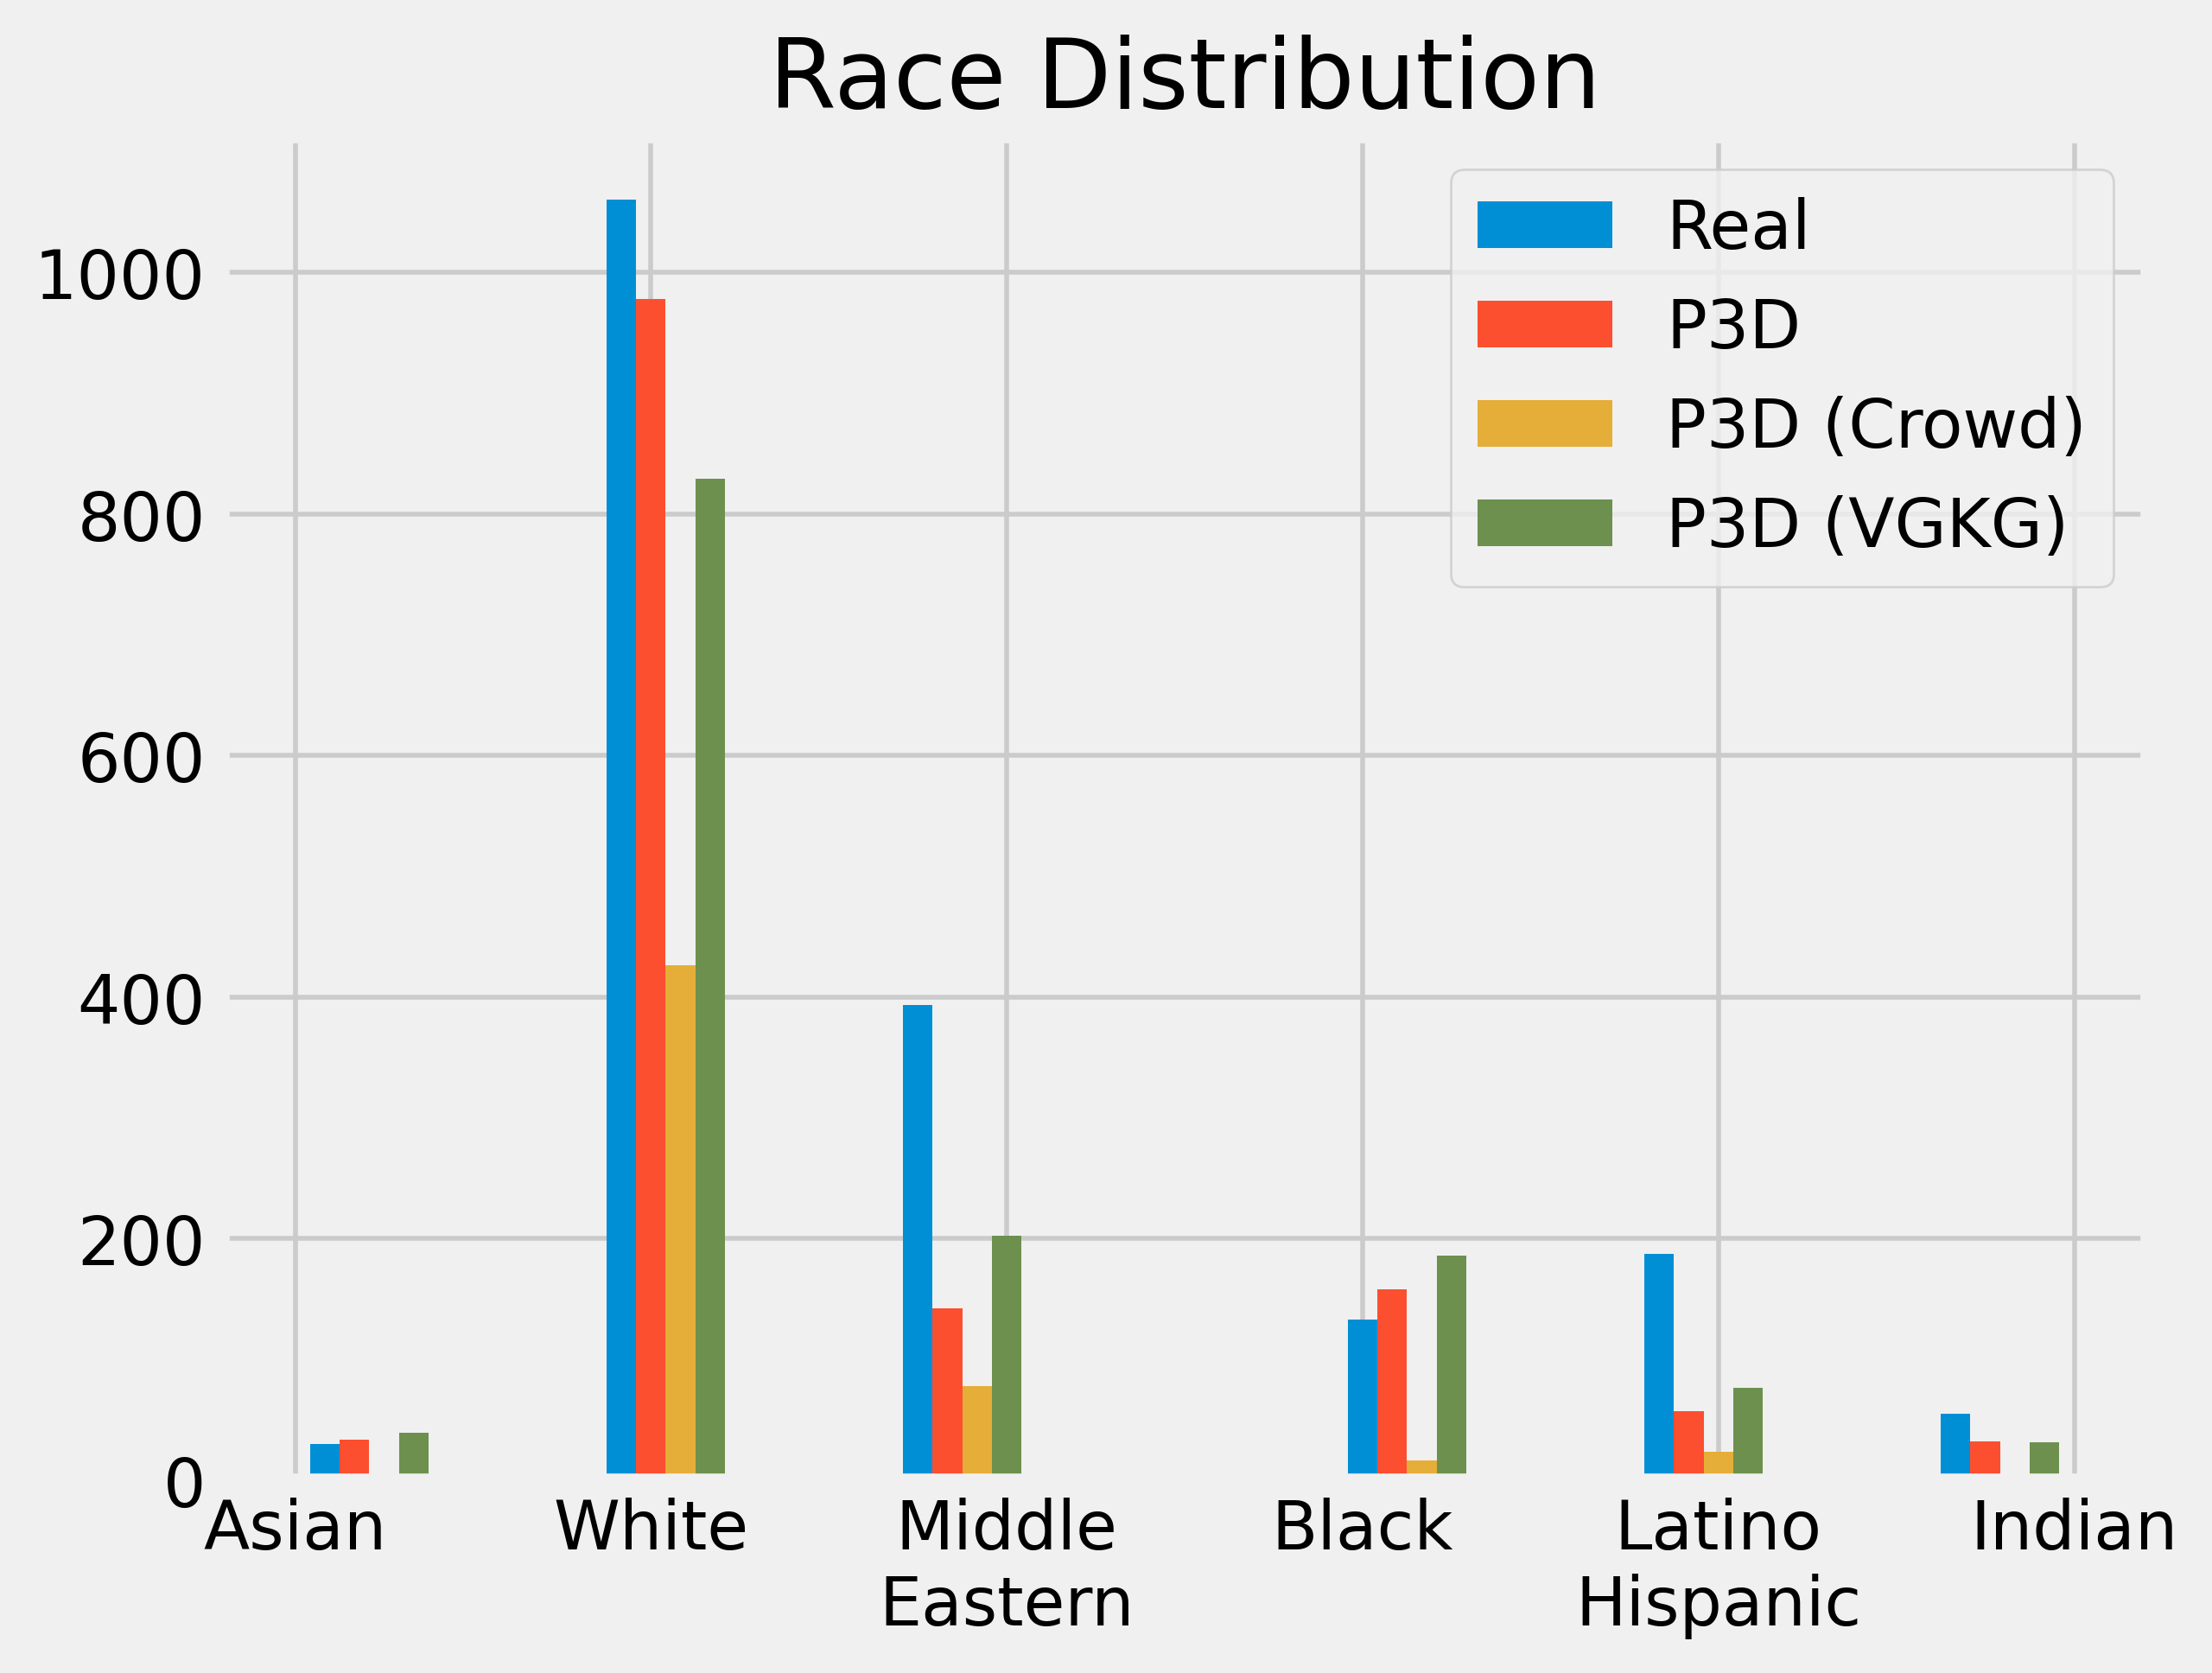

In [6]:
fig, ax = plt.subplots(dpi=400)
plt.title('Race Distribution')
plt.hist((races_real.to_numpy().flatten(),races_stylegan.to_numpy().flatten(),races_stylegan_cwdcnt.to_numpy().flatten(),
            races_stylegan_vgkg.to_numpy().flatten() ), label = ("Real","P3D","P3D (Crowd)","P3D (VGKG)"),bins=12, align='mid')
plt.legend(loc='upper right')
labels = ['Asian', 'White', 'Middle\nEastern', 'Black', 'Latino\nHispanic','Indian']
plt.xticks(range(len(labels)), labels)
fig.savefig(os.path.join('files', 'face_att_race.pdf'),bbox_inches='tight', 
               transparent=True,
               pad_inches=0)

plt.show()

